#Linear Regression Tutorial

This notebook is used for explaining the steps involved in creating a Linear Regression model 

1. Import the required libraries
2. Connect your google drive with Colab
3. Read the Housing Dataset 
4. Observe the structure of the Housing DataSet
5. Plot various parameters of the dataset vs median house value
6. Split the data in train test set
7. Build a linear regression model
8. Train this model
9. Use this model to make predictions on test data
10. Visualize the regression curve

## Note:- Before running this notebook, make sure you ran the Load Datasets notebook given in the website. 

## Import the required libraries

In [78]:
import matplotlib.pyplot as plt       # This library is used to plot curves
import pandas as pd                   # This library is used for data analysis
import numpy as np                     #This library is used for working with arrays and performing various linear algebra operations
from sklearn.model_selection import train_test_split  #This library is used for performing test_train_splits on the data         
from sklearn.linear_model import LinearRegression     #This library is used for creating Linear Regression Models 
from sklearn.metrics import mean_squared_error        #This library is used for finding mean squared error

## Connect your google drive with Colab 

In [79]:
from google.colab import drive                #This library is used for mounting drive

In [80]:
drive.mount('/content/gdrive')                       #Mount google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Read the Housing Dataset 

In [81]:
data = pd.read_csv('/content/gdrive/MyDrive/housing.csv')         # It stores the dataset in a pandas dataframe

## Observe the structure of the Housing DataSet

We can observe that Housing Dataset has a parameter called median_housing_value which is going to be our target variable.

There are other parameters like median_income, total_rooms, population, housing_median_age, etc. All of these parameters affects the median_housing_value

In [82]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [83]:
data.shape   # It will display the number of rows, number of columns in our dataframe

(20640, 10)

In [84]:
data.head(20)    # It shows the top 20 rows in the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


 ## Plot various parameters of the dataset vs median house value

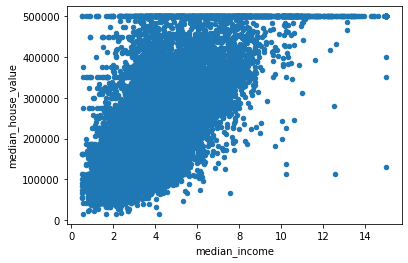

In [85]:
data.plot.scatter("median_income", "median_house_value")         #Plotting the values for median_house_value vs median_income

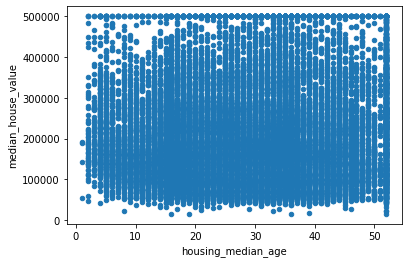

In [86]:
data.plot.scatter("housing_median_age", "median_house_value")       #Plotting the values for median_house_value vs housing_median_age

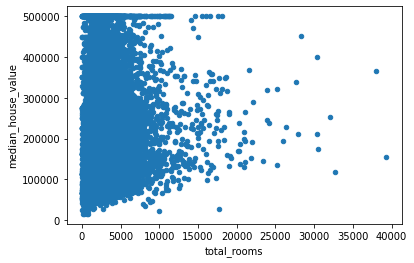

In [87]:
data.plot.scatter( "total_rooms","median_house_value")             #Plotting the values for median_house_value vs total_rooms

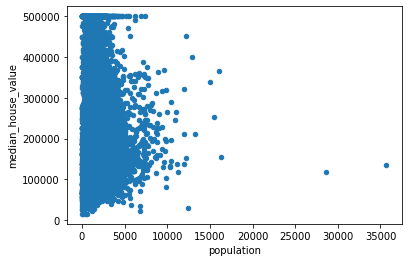

In [88]:
data.plot.scatter( "population","median_house_value")              #Plotting the values for median_house_value vs population

Observing the various above plots we can say that median_housing_value shows strong correlation with the median income.

For other parameters like population, housing_median_age,etc. the correlation with median income is not so strong

##  Split the data in train test set

We are splitting the dataframe into Train set having 80% of datapoints and into Test set having 20% of datapoints.

We are also converting our splitted datasets into numpy arrays which makes it easier to use along with other library functions

In [89]:
X_train, X_test, y_train, y_test = train_test_split(data.median_income, data.median_house_value, test_size = 0.01,random_state=20)     

X_train = np.array(X_train)   
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Plotting the train and test data

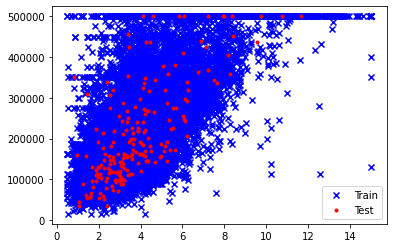

In [90]:
plt.scatter(X_train,y_train, c='blue', marker='x', label='Train')
plt.scatter(X_test, y_test, c='red', marker='.', label='Test')
plt.legend(loc='lower right')
plt.show()

## Build a linear regression model

We are creating our Linear Regression Model 

In [91]:
model = LinearRegression()        

 ## Train this model

In [92]:
model.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Use this model to make predictions on test data

In [93]:
y_pred = model.predict(X_test.reshape(-1,1))

Plotting the actual y_test value and predicted y value

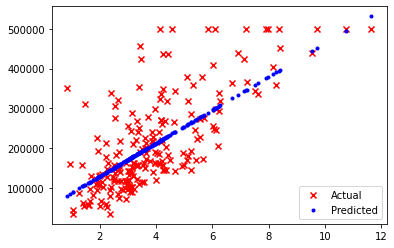

In [94]:
plt.scatter(X_test,y_test, c='red', marker='x', label='Actual')
plt.scatter(X_test, y_pred, c='blue', marker='.', label='Predicted')
plt.legend(loc='lower right')
plt.show()

## Visualize the regression curve

Plotting the regression curve

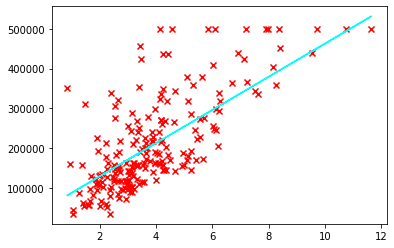

In [95]:
plt.scatter(X_test,y_test, c='red', marker='x', label='Actual')
plt.plot(X_test,y_pred,c='cyan')  